## 초기환경설정 및 라이브러리 로딩(import convention)

In [1]:
#import 컨벤션
import pandas as pd
import numpy as np
from scipy import stats
from random import randint
import itertools

In [2]:
# 시각화 그래프가 jupyter noteboob 상에 출력될 수 있도록 환경설정
%matplotlib inline

# 시각화 작업을 위한 모듈 로딩작업
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 사용을 원하는 한글폰트에 대한 공식이름 확인
font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

# 해당 한글폰트를 파이선 그래프에서 사용가능하도록 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## 데이터 로딩

In [71]:
# abc.csv 파일 메모리로 로딩
abc = pd.read_csv('abc.csv', skipinitialspace=True)

In [4]:
#정성적(범주형:명목, 서열척도), 정량적(연속형: 등간, 비율척도) 변수를 분리
cateV = abc[['gender','job','position','address']]
contV = abc.drop(['gender','job','position','address'], axis=1)

In [5]:
# 범주형 변수로 구성된 데이터프레임 간략조회
cateV.head()

,gender,job,position,address
0,1,1.0,2.0,Seoul
1,1,2.0,5.0,Busan
2,1,2.0,4.0,NaN
3,2,NaN,4.0,Gwangju
4,1,3.0,5.0,Suwon


In [6]:
# 연속형 변수로 구성된 데이터프레임 간략조회
contV.head()

,age,total,check,price,survey
0,26.0,66.3,5.0,5.1,3.0
1,54.0,63.7,NaN,NaN,NaN
2,41.0,61.1,5.0,4.7,2.0
3,45.0,59.8,7.0,NaN,NaN
4,70.0,650.0,5.0,5.0,4.0


## 특정변수의 데이터를 문자열 또는 수치로 자유롭게 변환

In [7]:
# abc데이터프레임의 gender변수의 세부 데이터 분포현황을 파악함
abc.gender.value_counts(normalize=False, sort=False, dropna = False)

1    71
2    79
Name: gender, dtype: int64

In [8]:
# gender변수의 데이터 값을 구체적인 성별 레이블로 변경해 새로운 변수컬럼(gender_label)으로 추가함
old = [1, 2]
new = ['남자', '여자']
abc['gender_label'] = abc['gender'].replace(old, new)

abc.head()

,gender,job,age,position,address,total,check,price,survey,gender_label
0,1,1.0,26.0,2.0,Seoul,66.3,5.0,5.1,3.0,남자
1,1,2.0,54.0,5.0,Busan,63.7,NaN,NaN,NaN,남자
2,1,2.0,41.0,4.0,NaN,61.1,5.0,4.7,2.0,남자
3,2,NaN,45.0,4.0,Gwangju,59.8,7.0,NaN,NaN,여자
4,1,3.0,70.0,5.0,Suwon,650.0,5.0,5.0,4.0,남자


In [9]:
# 셩별(gender)과 성별라벨(gender_label) 변수의 간략조회
abc[['gender', 'gender_label']].head()

,gender,gender_label
0,1,남자
1,1,남자
2,1,남자
3,2,여자
4,1,남자


In [10]:
# job 변수의 세부 데이터 분포현황을 파악함
abc.job.value_counts(normalize=False, sort=False, dropna = False)

NaN      8
 1.0    38
 2.0    51
 3.0    53
Name: job, dtype: int64

In [11]:
# job변수의 데이터 값을 구체적인 직업명칭 레이블로 변경해 새로운 변수컬럼(job_label)으로 추가함
old = [1, 2, 3]
new = ['학생', '주부', '직장인']
abc['job_label'] = abc['job'].replace(old, new)

abc.head()

,gender,job,age,position,address,total,check,price,survey,gender_label,job_label
0,1,1.0,26.0,2.0,Seoul,66.3,5.0,5.1,3.0,남자,학생
1,1,2.0,54.0,5.0,Busan,63.7,NaN,NaN,NaN,남자,주부
2,1,2.0,41.0,4.0,NaN,61.1,5.0,4.7,2.0,남자,주부
3,2,NaN,45.0,4.0,Gwangju,59.8,7.0,NaN,NaN,여자,NaN
4,1,3.0,70.0,5.0,Suwon,650.0,5.0,5.0,4.0,남자,직장인


In [12]:
# 직업변수와 직업라벨 변수의 간략조회
abc[['job', 'job_label']].head()

,job,job_label
0,1.0,학생
1,2.0,주부
2,2.0,주부
3,NaN,NaN
4,3.0,직장인


In [13]:
# position 변수의 세부 데이터 분포현황을 파악함
abc.position.value_counts(normalize=False, sort=False, dropna = False)

NaN     12
 1.0    20
 2.0    21
 3.0    17
 4.0    34
 5.0    46
Name: position, dtype: int64

In [14]:
# position변수의 데이터 값을 구체적인 직급명칭 레이블로 변경해 새로운 변수컬럼(position_label)으로 추가함
old = [1, 2, 3, 4, 5]
new = ['사원', '대리', '과장', '차장', '부장']
abc['position_label'] = abc['position'].replace(old, new)

abc.head(10)

,gender,job,age,position,address,total,check,price,survey,gender_label,job_label,position_label
0,1,1.0,26.0,2.0,Seoul,66.3,5.0,5.1,3.0,남자,학생,대리
1,1,2.0,54.0,5.0,Busan,63.7,NaN,NaN,NaN,남자,주부,부장
2,1,2.0,41.0,4.0,NaN,61.1,5.0,4.7,2.0,남자,주부,차장
3,2,NaN,45.0,4.0,Gwangju,59.8,7.0,NaN,NaN,여자,NaN,차장
4,1,3.0,70.0,5.0,Suwon,650.0,5.0,5.0,4.0,남자,직장인,부장
5,1,2.0,57.0,NaN,Daejeon,70.2,7.0,5.4,5.0,남자,주부,NaN
6,2,1.0,36.0,3.0,Busan,59.8,5.0,NaN,NaN,여자,학생,과장
7,1,2.0,NaN,3.0,Jeju,65.0,12.0,675.0,3.0,남자,주부,과장
8,1,1.0,56.0,5.0,NaN,57.2,3.0,4.4,4.0,남자,학생,부장
9,1,2.0,37.0,3.0,Busan,63.7,4.0,4.9,3.0,남자,주부,과장


In [15]:
# 직급변수와 직급라벨변수의 간략조회
abc[['position', 'position_label']].head()

,position,position_label
0,2.0,대리
1,5.0,부장
2,4.0,차장
3,4.0,차장
4,5.0,부장


In [16]:
# address 변수의 세부 데이터 분포현황을 파악함
abc.address.value_counts(dropna = False)

Seoul      65
Busan      28
Suwon      18
Daejeon    14
NaN        12
Gwangju     8
Jeju        5
Name: address, dtype: int64

In [17]:
# address변수의 도시명 데이터를 개별적인 숫자로 변경해 새로운 변수컬럼으로 추가함
old = ['Seoul', 'Busan', 'Daejeon', 'Gwangju', 'Jeju', 'Suwon']
new = [1, 2, 3, 4, 5, 6]
abc['city_num'] = abc['address'].replace(old, new)

abc.head(10)

,gender,job,age,position,address,total,check,price,survey,gender_label,job_label,position_label,city_num
0,1,1.0,26.0,2.0,Seoul,66.3,5.0,5.1,3.0,남자,학생,대리,1.0
1,1,2.0,54.0,5.0,Busan,63.7,NaN,NaN,NaN,남자,주부,부장,2.0
2,1,2.0,41.0,4.0,NaN,61.1,5.0,4.7,2.0,남자,주부,차장,NaN
3,2,NaN,45.0,4.0,Gwangju,59.8,7.0,NaN,NaN,여자,NaN,차장,4.0
4,1,3.0,70.0,5.0,Suwon,650.0,5.0,5.0,4.0,남자,직장인,부장,6.0
5,1,2.0,57.0,NaN,Daejeon,70.2,7.0,5.4,5.0,남자,주부,NaN,3.0
6,2,1.0,36.0,3.0,Busan,59.8,5.0,NaN,NaN,여자,학생,과장,2.0
7,1,2.0,NaN,3.0,Jeju,65.0,12.0,675.0,3.0,남자,주부,과장,5.0
8,1,1.0,56.0,5.0,NaN,57.2,3.0,4.4,4.0,남자,학생,부장,NaN
9,1,2.0,37.0,3.0,Busan,63.7,4.0,4.9,3.0,남자,주부,과장,2.0


In [18]:
# address변수와 city_num변수의 간략조회
abc[['address', 'city_num']].head()

,address,city_num
0,Seoul,1.0
1,Busan,2.0
2,NaN,NaN
3,Gwangju,4.0
4,Suwon,6.0


In [19]:
# address변수의 도시명 데이터를 활용해 수도권 및 지방지역 레이블로 변경해 새로운 변수컬럼으로 추가함
old = ['Seoul', 'Busan', 'Daejeon', 'Gwangju', 'Jeju', 'Suwon']
new = ['capital area', 'provinces', 'provinces', 'provinces', 'provinces', 'capital area']
abc['city_location'] = abc['address'].replace(old, new)

abc.head()

,gender,job,age,position,address,total,check,price,survey,gender_label,job_label,position_label,city_num,city_location
0,1,1.0,26.0,2.0,Seoul,66.3,5.0,5.1,3.0,남자,학생,대리,1.0,capital area
1,1,2.0,54.0,5.0,Busan,63.7,NaN,NaN,NaN,남자,주부,부장,2.0,provinces
2,1,2.0,41.0,4.0,NaN,61.1,5.0,4.7,2.0,남자,주부,차장,NaN,NaN
3,2,NaN,45.0,4.0,Gwangju,59.8,7.0,NaN,NaN,여자,NaN,차장,4.0,provinces
4,1,3.0,70.0,5.0,Suwon,650.0,5.0,5.0,4.0,남자,직장인,부장,6.0,capital area


In [20]:
# address 변수를 활용한  도시숫자 변수 및 지역위치 변수 간략조회
abc[['address', 'city_num', 'city_location']].head()

,address,city_num,city_location
0,Seoul,1.0,capital area
1,Busan,2.0,provinces
2,NaN,NaN,NaN
3,Gwangju,4.0,provinces
4,Suwon,6.0,capital area


In [21]:
# address변수의 도시명 데이터를 개별적인 숫자로 변경해 새로운 변수컬럼으로 추가함
old = ['capital area', 'provinces']
new = [1, 2]
abc['city_location_num'] = abc['city_location'].replace(old, new)

abc.head(10)

,gender,job,age,position,address,total,check,price,survey,gender_label,job_label,position_label,city_num,city_location,city_location_num
0,1,1.0,26.0,2.0,Seoul,66.3,5.0,5.1,3.0,남자,학생,대리,1.0,capital area,1.0
1,1,2.0,54.0,5.0,Busan,63.7,NaN,NaN,NaN,남자,주부,부장,2.0,provinces,2.0
2,1,2.0,41.0,4.0,NaN,61.1,5.0,4.7,2.0,남자,주부,차장,NaN,NaN,NaN
3,2,NaN,45.0,4.0,Gwangju,59.8,7.0,NaN,NaN,여자,NaN,차장,4.0,provinces,2.0
4,1,3.0,70.0,5.0,Suwon,650.0,5.0,5.0,4.0,남자,직장인,부장,6.0,capital area,1.0
5,1,2.0,57.0,NaN,Daejeon,70.2,7.0,5.4,5.0,남자,주부,NaN,3.0,provinces,2.0
6,2,1.0,36.0,3.0,Busan,59.8,5.0,NaN,NaN,여자,학생,과장,2.0,provinces,2.0
7,1,2.0,NaN,3.0,Jeju,65.0,12.0,675.0,3.0,남자,주부,과장,5.0,provinces,2.0
8,1,1.0,56.0,5.0,NaN,57.2,3.0,4.4,4.0,남자,학생,부장,NaN,NaN,NaN
9,1,2.0,37.0,3.0,Busan,63.7,4.0,4.9,3.0,남자,주부,과장,2.0,provinces,2.0


In [22]:
# address 변수를 활용한  도시숫자 변수 및 지역위치 변수, 지역위치 숫자변수에 대한 간략조회
abc[['address', 'city_num', 'city_location', 'city_location_num']].head()

,address,city_num,city_location,city_location_num
0,Seoul,1.0,capital area,1.0
1,Busan,2.0,provinces,2.0
2,NaN,NaN,NaN,NaN
3,Gwangju,4.0,provinces,2.0
4,Suwon,6.0,capital area,1.0


## 연속형 변수를 범주화

In [23]:
# age 변수에 들어 있는 연령데이터를 연령층으로 범주화 하는데 사용할 구간범위 설정
bins = [-np.inf, 30, 45, 65, np.inf]
bins

[-inf, 30, 45, 65, inf]

In [24]:
# age변수의 연령층 범주데이터 변환을 위한  또다른 방식의 구간범위 설정
bins2 = [abc.age.min(), 30, 45, 65, abc.age.max()]
bins2

[20.0, 30, 45, 65, 70.0]

In [25]:
# age변수에 대한 범주화 구분 수치 및 레이블 설정
group_num = [1, 2, 3, 4]
group_label = ['청년층', '중년층', '장년층', '노년층']

In [26]:
# age변수데이터를 사전에 bins에서 정의한 구간범위에 따라 범주화 수치를 부여 하여 새로운 변수컬럼 생성
abc['age_class_num'] = pd.cut(abc.age, bins, labels=group_num)

In [27]:
# age변수데이터를 사전에 bins2에서 정의한 구간범위에 따라 범주화 라벨을 부여 하여 새로운 변수컬럼 생성
abc['age_class_label'] = pd.cut(abc.age, bins2, labels=group_label)

In [28]:
# age변수데이터의 연령층 수치 및 라벨을 부여한 범주화 작업내용 간략조회
abc[['age', 'age_class_num', 'age_class_label']].head(10)

,age,age_class_num,age_class_label
0,26.0,1.0,청년층
1,54.0,3.0,장년층
2,41.0,2.0,중년층
3,45.0,2.0,중년층
4,70.0,4.0,노년층
5,57.0,3.0,장년층
6,36.0,2.0,중년층
7,NaN,NaN,NaN
8,56.0,3.0,장년층
9,37.0,2.0,중년층


## 그룹화된 집계 연산1

In [29]:
# address 주소지에 따른 연령변수에 대한 평균값 그룹연산
abc[['age']].groupby(abc['address']).mean()

,age
address,
Busan,45.214286
Daejeon,47.700000
Gwangju,34.714286
Jeju,35.500000
Seoul,43.220339
Suwon,47.000000


In [30]:
# job 직업유형에 따른 이벤트반응금액(price)에 대한 중앙값을 구하는 그룹연산
abc[['price']].groupby(abc['job']).median()

,price
job,
1.0,5.25
2.0,5.45
3.0,6.30


In [31]:
# job_label 직업라벨에 따른 이벤트반응금액(price)에 대한 중앙값을 구하는 그룹연산
abc[['price']].groupby(abc['job_label'], sort=False).median()

,price
job_label,
학생,5.25
주부,5.45
직장인,6.30


In [32]:
# 직업 및 성별에 따른 이벤트반응금액(price)에 대한 평균값을 구하는 그룹연산
abc[['price']].groupby([abc['job_label'],abc['gender_label']]).mean()

price
job_label gender_label           
주부        남자            57.447059
          여자            14.236842
직장인       남자             5.425000
          여자            27.137500
학생        남자             4.418182
          여자           -40.827273

In [33]:
# 직업라벨 및 성별에 따른 이벤트반응금액(price)에 대한 기술통계분석을 수행하는 그룹연산
abc[['price']].groupby([abc['job_label'],abc['gender_label']]).describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


price
job_label gender_label                  
주부        남자           count   17.000000
                       mean    57.447059
                       std    167.872675
                       min      3.800000
                       25%           NaN
                       50%           NaN
                       75%           NaN
                       max    675.000000
          여자           count   19.000000
                       mean    14.236842
                       std     29.522971
                       min     -5.900000
                       25%           NaN
                       50%           NaN
                       75%           NaN
                       max    115.700000
직장인       남자           count   12.000000
                       mean     5.425000
                       std      0.894554
                       min      3.900000
                       25%           NaN
                       50%           NaN
                       75%           NaN
                       max      6.400000
          여자           count   16.000000
                       mean    27.137500
                       std     82.501062
                       min      4.300000
                       25%           NaN
                       50%           NaN
                       75%           NaN
                       max    336.500000
학생        남자           count   11.000000
                       mean     4.418182
                       std      3.106708
                       min     -4.800000
                       25%           NaN
                       50%           NaN
                       75%           NaN
                       max      6.400000
          여자           count   11.000000
                       mean   -40.827273
                       std    128.154275
                       min   -345.600000
                       25%           NaN
                       50%           NaN
                       75%           NaN
                       max     85.100000

## 그룹화된 집계 연산2

In [34]:
# abc 데이터프레임에 대해 성별(gender)에 따른 그룹연산결과를 비교분석 하기 위한 설정
bygender = abc.groupby('gender_label')
bygender

In [35]:
# 성별(gender)에 따른 이벤트반응금액(price)에 대한 기술통계분석을 수행하는 그룹연산
bygender[['price']].mean()

,price
gender_label,
남자,26.280952
여자,5.525000


In [36]:
# 성별(gender)에 따른 총거래금액(total), 이벤트반응금액(price)에 대한 평균값을 구하는 그룹연산
bygender[['total', 'price']].mean()

,total,price
gender_label,,
남자,80.307042,26.280952
여자,78.789873,5.525000


In [37]:
# 성별(gender)에 따른 이벤트반응금액(price)에 대한 기술통계분석을 수행하는 그룹연산
bygender[['price']].describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


price
gender_label                  
남자           count   42.000000
             mean    26.280952
             std    108.060307
             min     -4.800000
             25%           NaN
             50%           NaN
             75%           NaN
             max    675.000000
여자           count   48.000000
             mean     5.525000
             std     81.811268
             min   -345.600000
             25%           NaN
             50%           NaN
             75%           NaN
             max    336.500000

In [38]:
# 성별(gender)에 따른 총거래금액(total), 이벤트반응금액(price)에 대한 기술통계분석을 수행하는 그룹연산
bygender[['total', 'price']].describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


total       price
gender_label                              
남자           count   71.000000   42.000000
             mean    80.307042   26.280952
             std     69.321716  108.060307
             min     57.200000   -4.800000
             25%     65.000000         NaN
             50%     70.200000         NaN
             75%     80.600000         NaN
             max    650.000000  675.000000
여자           count   79.000000   48.000000
             mean    78.789873    5.525000
             std     18.921644   81.811268
             min      5.000000 -345.600000
             25%     72.800000         NaN
             50%     79.300000         NaN
             75%     87.100000         NaN
             max    180.000000  336.500000

In [39]:
# 성별(gender)에 따른 총거래금액(total), 이벤트반응금액(price)에 대한 주요 기술통계량을 분석하는 그룹연산
bygender[['total', 'price']].agg([np.sum, np.mean, np.median, np.std, len])

total                                      price             \
                 sum       mean median        std   len     sum       mean   
gender_label                                                                 
남자            5701.8  80.307042   70.2  69.321716  71.0  1103.8  26.280952   
여자            6224.4  78.789873   79.3  18.921644  79.0   265.2   5.525000   

                                       
             median         std   len  
gender_label                           
남자             5.20  108.060307  71.0  
여자             6.05   81.811268  79.0

## 두 변수간 교차분석

In [40]:
# 성별라벨과 직급라벨 변수간 교차분석 ==> 직급라벨의 직급순서가 어색함
pd.crosstab(abc.gender_label, abc.position_label)

position_label,과장,대리,부장,사원,차장
gender_label,,,,,
남자,8,10,23,8,16
여자,9,11,23,12,18


In [41]:
# 직급라벨 간략조회
abc['position_label'].head()

0    대리
1    부장
2    차장
3    차장
4    부장
Name: position_label, dtype: object

In [42]:
# 직급라벨 변수의 데이터를 범주형데이터로 명시적으로 만들어줌
abc['position_label'] = pd.Categorical.from_array(abc.position_label)
abc['position_label'].head()

0    대리
1    부장
2    차장
3    차장
4    부장
Name: position_label, dtype: category
Categories (5, object): [과장, 대리, 부장, 사원, 차장]

In [43]:
# 직급라벨 변수의 개별직급의 서열순위를 명시적으로 설정함
position_order = ['사원', '대리', '과장', '차장', '부장']
abc['position_label'] = abc['position_label'].cat.reorder_categories(position_order, ordered=True)
abc['position_label'].head()

0    대리
1    부장
2    차장
3    차장
4    부장
Name: position_label, dtype: category
Categories (5, object): [사원 < 대리 < 과장 < 차장 < 부장]

In [44]:
# 성별라벨과 직급라벨 변수간 교차분석
pd.crosstab(abc.gender_label, abc.position_label, margins=True)

position_label,사원,대리,과장,차장,부장,All
gender_label,,,,,,
남자,8,10,8,16,23,65
여자,12,11,9,18,23,73
All,20,21,17,34,46,138


In [45]:
# 성별라벨과 직급라벨 변수간 교차분석: 빈도수가 아닌 백분율로 표현  normalize=all, index, columns
pd.crosstab(abc.gender_label, abc.position_label, margins=True, normalize='all')

position_label,사원,대리,과장,차장,부장,All
gender_label,,,,,,
남자,0.057971,0.072464,0.057971,0.115942,0.166667,0.471014
여자,0.086957,0.079710,0.065217,0.130435,0.166667,0.528986
All,0.144928,0.152174,0.123188,0.246377,0.333333,1.000000


In [46]:
# 그래프를 그리기 위해 margin없는 성별라벨과 직급라벨 변수간 교차분석 테이블 생성
gp = pd.crosstab(abc.gender_label, abc.position_label)
gp

position_label,사원,대리,과장,차장,부장
gender_label,,,,,
남자,8,10,8,16,23
여자,12,11,9,18,23


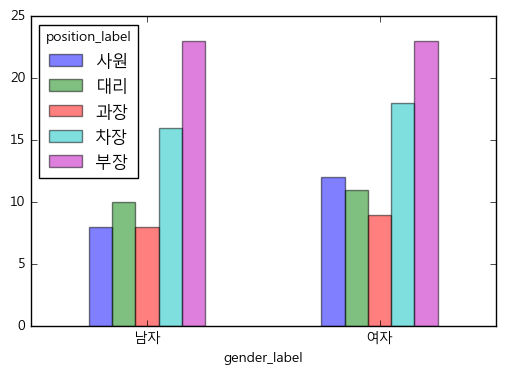

In [47]:
# 성별라벨과 직급라벨 변수간 교차분석결과를 그래프(dodge형)로 구현
gp.plot(kind='bar', rot=0, alpha=0.5)

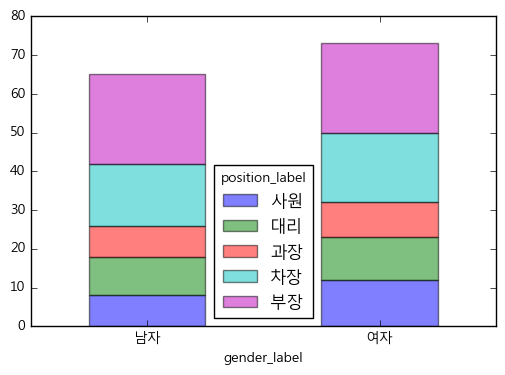

In [48]:
# 성별라벨과 직급라벨 변수간 교차분석결과를 그래프(stack형)로 구현
gp.plot(kind='bar', stacked = True, rot=0, alpha=0.5)

In [49]:
# 성별라벨과 직급라벨 변수간 교차분석: 빈도수가 아닌 비율로 표현  normalize=all, index, columns
gp_prop = pd.crosstab(abc.gender_label, abc.position_label, normalize='index')
pd.crosstab(abc.gender_label, abc.position_label, normalize='index')

position_label,사원,대리,과장,차장,부장
gender_label,,,,,
남자,0.123077,0.153846,0.123077,0.246154,0.353846
여자,0.164384,0.150685,0.123288,0.246575,0.315068


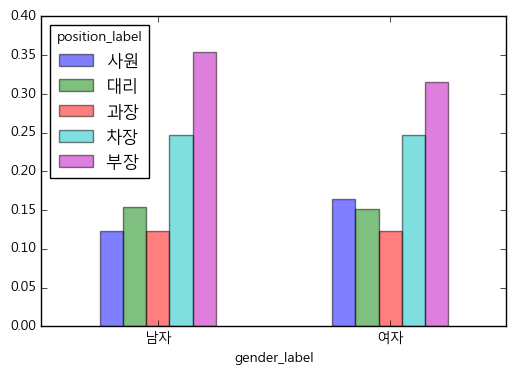

In [50]:
# 성별라벨과 직급라벨 변수간 교차분석결과(비율기준)를 그래프(dodge형)로 구현
gp_prop.plot(kind='bar', rot=0, alpha=0.5)

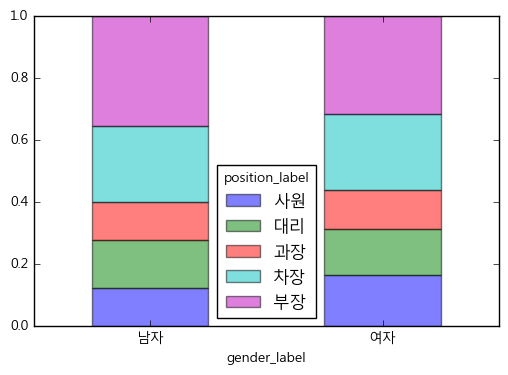

In [51]:
# 성별라벨과 직급라벨 변수간 교차분석결과(비율기준)를 그래프(stack형)로 구현
gp_prop.plot(kind='bar', stacked = True, rot=0, alpha=0.5)

## 피벗핑을 활용한 교차분석

In [52]:
# 성별라벨 및 사원라벨에 따른 이벤트반응금액(price) 피벗팅 테이블 도출
abc.pivot_table('price', 'gender_label', 'position_label', aggfunc = 'mean', margins =True)

position_label,사원,대리,과장,차장,부장,All
gender_label,,,,,,
남자,4.950000,4.050000,117.100000,5.527273,5.033333,22.655263
여자,-28.371429,4.942857,3.200000,5.922222,11.931250,2.186364
All,-16.254545,4.466667,65.327273,5.705000,9.448000,11.671951


In [53]:
# price변수의 기본구조 조회
abc[['price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
price    90 non-null float64
dtypes: float64(1)
memory usage: 1.2 KB


In [54]:
# price변수의 기술통계분석 조회
abc[['price']].describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,price
count,90.000000
mean,15.211111
std,94.985705
min,-345.600000
25%,NaN
50%,NaN
75%,NaN
max,675.000000


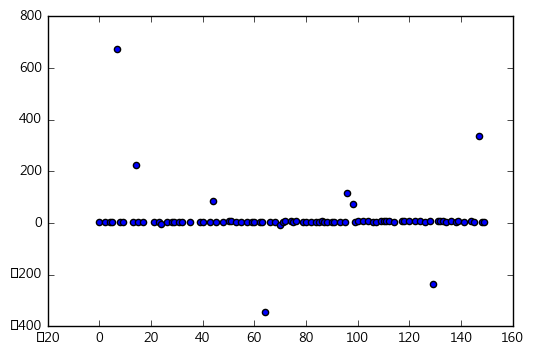

In [55]:
# price변수의 산점도 작성
plt.scatter(abc.price.index, abc.price)

In [56]:
# price변수의 데이터내용 조회
p = abc.price.value_counts(sort=False, ascending=True).sort_index()
p

-345.6    1
-235.8    1
-5.9      1
-4.8      1
 3.0      1
 3.3      1
 3.4      1
 3.8      1
 3.9      1
 4.0      2
 4.1      3
 4.3      2
 4.4      2
 4.7      3
 4.9      2
 5.0      5
 5.1      3
 5.2      4
 5.3      1
 5.4      3
 5.5      3
 5.6      2
 5.7      3
 5.8      2
 5.9      1
 6.0      3
 6.1      2
 6.2      4
 6.3      4
 6.4      5
 6.5      2
 6.7      4
 6.8      2
 6.9      2
 7.0      1
 7.1      1
 7.2      1
 7.7      2
 7.9      1
 75.1     1
 85.1     1
 115.7    1
 225.8    1
 336.5    1
 675.0    1
Name: price, dtype: int64

In [57]:
# price변수의 데이터내용을 앞부분에서 간략하게 조회
p.head(10)

-345.6    1
-235.8    1
-5.9      1
-4.8      1
 3.0      1
 3.3      1
 3.4      1
 3.8      1
 3.9      1
 4.0      2
Name: price, dtype: int64

In [58]:
# price변수의 데이터내용을 뒷부분에서 간략하게 조회
p.tail(10)

7.1      1
7.2      1
7.7      2
7.9      1
75.1     1
85.1     1
115.7    1
225.8    1
336.5    1
675.0    1
Name: price, dtype: int64

In [59]:
# price변수의 내용중 이상치를 제외한 정상범위 데이터 필터링
temp = abc.ix[(abc['price']>=0) & (abc['price']<=10), : ]

In [60]:
# 이상치가 제거된 price변수의 기본구조정보조회
temp[['price']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 149
Data columns (total 1 columns):
price    80 non-null float64
dtypes: float64(1)
memory usage: 1.2 KB


In [61]:
# 이상치가 제거된 price변수의 기술통계분석내용 조회
temp[['price']].describe()

,price
count,80.000000
mean,5.598750
std,1.063609
min,3.000000
25%,5.000000
50%,5.650000
75%,6.400000
max,7.900000


In [62]:
# 성별과 직급변수에 따른 이벤트반응금액(price)을 비교하기 위한 피벗팅을 활용한 교차분석
temp.pivot_table('price', 'gender_label', 'position_label', aggfunc = 'mean', margins =True)

position_label,사원,대리,과장,차장,부장,All
gender_label,,,,,,
남자,4.95,5.314286,5.520,5.527273,5.033333,5.297222
여자,6.20,4.942857,5.475,5.922222,6.484615,5.930769
All,5.70,5.128571,5.500,5.705000,5.890909,5.626667


In [63]:
# 피벗팅을 결과를 그래프화하기 위한 데이터준비
temp.pivot_table('price', 'gender_label', 'position_label', aggfunc = 'mean')
out = temp.pivot_table('price', 'gender_label', 'position_label', aggfunc = 'mean')

In [ ]:
# 성별라벨과 직급라벨 변수간 이벤트반응금액(price) 평균값을 비교하기 위한 그래프(dodge형) 구현
out.plot(kind='bar', rot=0, alpha=0.5)

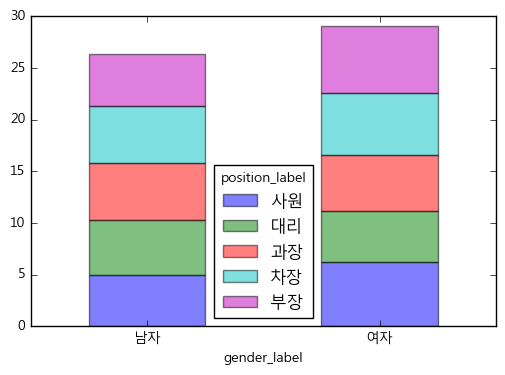

In [65]:
# 성별라벨과 직급라벨 변수간 이벤트반응금액(price) 평균값을 비교하기 위한 그래프(stack형) 구현
out.plot(kind='bar', stacked = True, rot=0, alpha=0.5)

## end of documents